# Ejercicio Support Vector Machines

En este ejercicio, usaremos SVM para crear un clasificador de spam. A continuación, trabajaremos sobre un conjunto de mails sin procesar y crearemos un clasificador en los correos electrónicos procesados utilizando un SVM para determinar si son spam o no.

Lo primero que vamos a hacer es mirar un conjunto de datos y ver cómo funciona una SVM lineal en el conjunto de datos para diferentes valores de C (que es similar al término de regularización en regresión lineal/logística).

### EJERCICIOS

#### 1. Carga las librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
import seaborn as sns
%matplotlib inline

#### 2. Cargamos los datos

In [3]:
raw_data = loadmat('data/ejer_1_data1.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

#### 3. Crea un DataFrame con las features y el target

In [4]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']
data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


#### 4. Representa los datos en un gráfico de dispersión

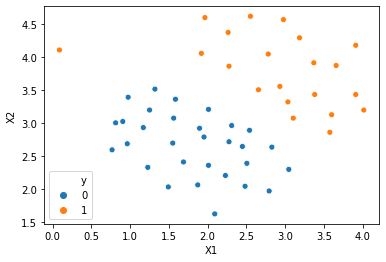

In [5]:
sns.scatterplot(data=data,
                x="X1",
                y="X2",
                hue="y");

Fíjate que hay un ejemplo positivo atípico que se sienta aparte de los demás.  Las clases siguen siendo linealmente separables, pero es un ajuste muy "ajustado".  Vamos a entrenar un SVM lineal para aprender el límite de clase.

#### 5. LinearSVC
Créate un SVC lineal con los siguientes parámetros:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [6]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=10000)
svc

LinearSVC(C=1, loss='hinge', max_iter=10000)

#### 6. Calcula el score

Para la primera ejecución, vamos a usar C=1:

In [7]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

#### 7. Incrementa el valor de C hasta que obtengas un clasificador perfecto

In [8]:
# C decreases the regularization. If C is los, more flexible is the model and better generalization
svc2 = svm.LinearSVC(C=500, loss='hinge', max_iter=10000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

C:\Users\TheBridge\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


1.0

Hemos conseguido una clasificación perfecta en entrenamimento, sin embargo, al aumentar el valor de C podemos crear un límite de decisión que ya no es un ajuste natural para los datos, sino que será un modelo más generalizado. Podemos visualizar esto mirando el nivel de confianza para cada predicción de clase, que es una función de la distancia del punto desde el hiperplano, la cuál podemos calcular con la función ``decision_function()``.


#### 8. Representa la función de decisión

Utiliza el método `decision_function()` del modelo SVM que te has creado en el ejercicio 5.

Para obtener el nivel de confianza, puedes utilizar el siguiente comando:
```Python
conf_level = svc.decision_function(data[['X1', 'X2']])
```

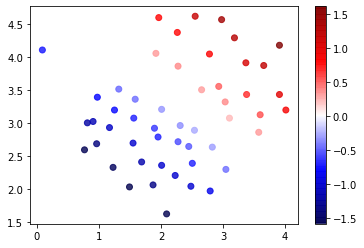

In [9]:
conf_level = svc.decision_function(data[['X1', 'X2']])

plt.scatter(data.X1,
            data.X2,
            alpha = .8,
            c = conf_level,
            cmap = 'seismic')
cbar = plt.colorbar()

#### 9. Repite lo mismo con el segundo modelo

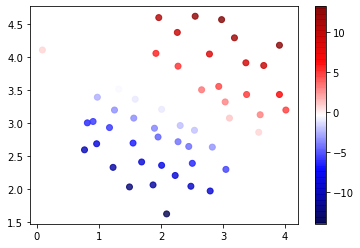

In [10]:
conf_level = svc2.decision_function(data[['X1', 'X2']])

plt.scatter(data.X1,
            data.X2,
            alpha = .8,
            c = conf_level,
            cmap = 'seismic')

cbar = plt.colorbar()

### Ejercicio 2

Ahora que ya hemos probado el SVM lineal, es hora de dar un paso más. Vamos a ir con la versión no lneal. Para ello, podemos utilizar los diferentes kernels que hemos comentado en clase:

#### 1. Carga los datos de `ejer_1_data2.mat` al igual que se hizo en el primer ejercicio

In [11]:
raw_data = loadmat('data/ejer_1_data2.mat')

#### 2. Crea un DataFrame con las features y el target

In [12]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']
data.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


#### 3. Representa los datos en un gráfico de dispersión

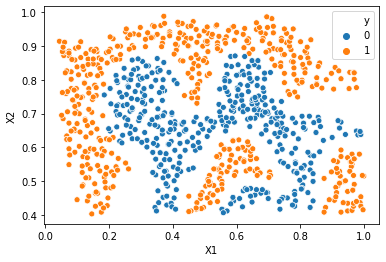

In [13]:
sns.scatterplot(data=data,
                x="X1",
                y="X2",
                hue="y");

Para este conjunto de datos, crearemos un clasificador SVM utilizando el kernel RBF (que es el que nos ofrece la función por defecto) y examinaremos su precisión en los datos de entrenamiento.

#### 4. Crea un modelo SVC con los siguientes parámetros
```Python
SVC(C=100, gamma=10, probability=True)
```


In [14]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc

SVC(C=100, gamma=10, probability=True)

#### 5. Entrena el modelo y calcula el score

In [15]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

#### 6. Representa, en un gráfico de dispersión, la probabilidad de predecir un 0

Para ello, recuerda cómo sacábamos probabilidades y cuál será la que haga referencia al 0, en este caso donde tenemos que predecir 0 o 1. Además, repasa la parte de representación para recordar cómo se podía crear un gráfico donde le especificquemos las 2 variables del dataset como X e Y, y le añadamos un color en función de la probabilidad que se acaba de comentar.

Como habrás podido observar, estamos sacando probabilidades del algoritmo SVC, pese a que en clase no lo hemos podido hacer. Esto es debido a que lo hemos instanciado con el parámetro 
```Python
probability=True
```

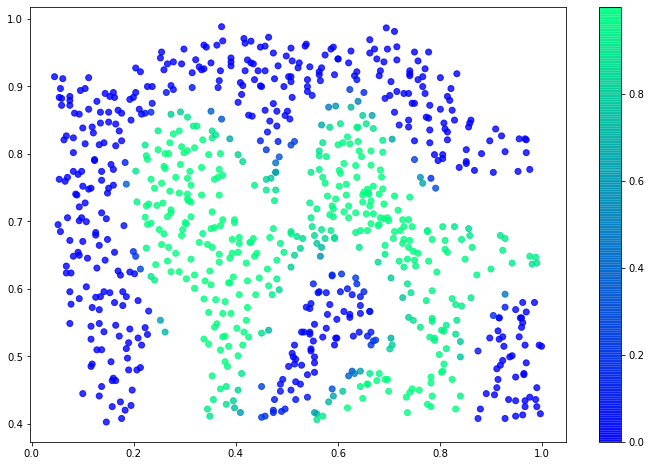

In [17]:
# Probability os being 0, green
probaility = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(data.X1,
            data.X2,
            alpha = .8,
            c = probaility,
            cmap = 'winter')

cbar = plt.colorbar()